In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as szk
from sklearn.cluster import KMeans, AgglomerativeClustering
import re
from scipy import stats
import networkx as nx
from random import sample

In [2]:
def Clean_names(player_name):
    # Search for opening bracket in the name followed by
    # any characters repeated any number of times
    if re.search('\S+\s[A-Za-z-\w.]+', player_name):
  
        # Extract the position of beginning of pattern
        pos = re.search('\S+\s[A-Za-z-\w.]+', player_name).end()
  
        # return the cleaned name
        return player_name[:pos]
  
    else:
        # if clean up needed return the same name
        return player_name
    

def clean_salary(sal):
    sal = str(sal)
    return float(sal[1:])

def clean_pos(p):
    if re.search('\w+', p):
        pos = re.search('\w+', p).end()
        return p[:pos]

def pos(p):
    pos_nums = ['PG', 'SG', 'SF', 'PF', 'C']
    return pos_nums.index(p) + 1

In [3]:
espn_scores = pd.read_csv('espn_full.csv')
espn_scores.rename(columns={'PLAYER': 'Player'}, inplace=True)
espn_scores['Player'] = espn_scores['Player'].apply(Clean_names)
espn_scores.drop(columns={'PTS','FT%','RK'}, inplace=True)
espn_scores

,Player,TEAM,GP,MPG,FG%,3PM,RPG,APG,STPG,BLKPG,TOPG,ESPN
0,Nikola Jokic,DEN,61,35.2,0.567,1.4,11.0,8.7,1.4,0.6,3.2,54.5
1,Giannis Antetokounmpo,MIL,51,33.6,0.568,1.1,11.4,6.0,1.2,1.3,3.6,52.4
2,James Harden,BKN,42,37.1,0.463,2.8,8.0,10.9,1.2,0.7,4.1,50.6
3,Luka Doncic,DAL,55,35.2,0.482,3.0,8.0,8.7,1.0,0.6,4.3,50.1
4,Joel Embiid,PHI,42,31.9,0.514,1.2,11.0,3.1,1.0,1.4,3.1,49.8
...,...,...,...,...,...,...,...,...,...,...,...,...
531,Ashton Hagans,MIN,2,2.0,0.000,0.0,0.0,0.0,0.0,0.0,0.5,-0.4
532,Greg Whittington,DEN,4,3.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,-0.6
533,Kris Dunn,ATL,1,13.0,0.000,0.0,1.0,0.0,1.0,1.0,1.0,-1.3
534,Will Magnay,NOR,1,3.0,0.000,0.0,0.0,0.0,0.0,0.0,1.0,-1.5


In [4]:
all_players = pd.read_csv('data_with_clusters.csv')
# all_players.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Rk'}, inplace=True)
all_players = pd.merge(all_players, espn_scores, on='Player')
all_players.drop_duplicates(inplace=True)
all_players = all_players.reset_index().drop(columns='index')
all_players['VORP'] = all_players['VORP'].round(1)
all_players

,Unnamed: 0,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,GP,MPG,FG%,3PM,RPG,APG,STPG,BLKPG,TOPG,ESPN
0,0,Aaron Gordon,25.0,27,755,15.233333,0.562667,0.369,0.300,5.4,...,41,28.2,0.465,1.4,5.9,3.5,0.7,0.7,2.1,25.0
1,1,Aaron Holiday,24.0,57,980,8.800000,0.499000,0.427,0.175,1.1,...,59,17.0,0.383,1.0,1.2,1.6,0.6,0.2,0.9,10.5
2,2,Aaron Nesmith,21.0,34,433,6.400000,0.513000,0.712,0.154,4.1,...,36,12.6,0.376,0.7,2.2,0.4,0.3,0.2,0.5,6.1
3,3,Abdel Nader,27.0,24,355,13.400000,0.605000,0.371,0.319,2.3,...,24,14.8,0.491,0.8,2.6,0.8,0.4,0.4,0.8,11.5
4,4,Al Horford,34.0,28,782,17.500000,0.538000,0.422,0.061,3.9,...,28,27.9,0.450,2.0,6.7,3.4,0.9,0.9,1.0,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,400,Xavier Tillman,22.0,48,917,15.000000,0.597000,0.217,0.182,7.2,...,49,19.1,0.552,0.4,4.4,1.3,0.8,0.6,0.7,15.3
404,401,Yuta Watanabe,26.0,41,549,12.800000,0.573000,0.485,0.174,6.4,...,43,13.7,0.462,0.7,3.2,0.7,0.5,0.4,0.4,9.5
405,402,Zach LaVine,25.0,53,1867,21.600000,0.633000,0.424,0.268,1.9,...,53,35.2,0.506,3.4,5.1,5.1,0.8,0.5,3.6,43.0
406,403,Zeke Nnaji,20.0,38,357,10.900000,0.615000,0.571,0.165,4.2,...,39,9.2,0.484,0.5,1.5,0.2,0.2,0.1,0.2,5.5


In [5]:
all_players.sort_values('VORP', ascending=False)[:10][['Player','Pos','VORP', 'ESPN','3PA']].reset_index().drop(columns='index')

,Player,Pos,VORP,ESPN,3PA
0,Nikola Jokic,C,7.2,54.5,3.3
1,Stephen Curry,PG,4.6,49.3,12.0
2,Giannis Antetokounmpo,PF,4.5,52.4,3.6
3,Luka Doncic,PG,4.5,50.1,8.4
4,Kawhi Leonard,SF,3.6,44.4,5.0
5,Zion Williamson,PF,3.5,43.9,0.6
6,Jimmy Butler,SF,3.5,42.2,2.0
7,Julius Randle,PF,3.4,43.5,5.3
8,LeBron James,PG,3.4,46.7,6.5
9,Damian Lillard,PG,3.4,45.1,10.7


In [6]:
all_players[all_players['Player'] == 'Ja Morant']['3P%']

166    0.295
Name: 3P%, dtype: float64

In [7]:
all_players[all_players['Pos'] == 'PG']['3P%'].mean()

0.35132467532467526

In [8]:
edges = pd.read_csv('vorp_pos_edges.csv')
edges.drop(columns='Unnamed: 0', inplace=True)
edges.head()

,source,target
0,Aaron Holiday,Aaron Holiday
1,Aaron Holiday,Brad Wanamaker
2,Aaron Holiday,Coby White
3,Aaron Holiday,Killian Hayes
4,Alex Caruso,Alex Caruso


In [9]:
edges[edges['source'] == 'Ja Morant'].sample(20)

,source,target
19702,Ja Morant,Alec Burks
19739,Ja Morant,Norman Powell
19741,Ja Morant,Paul Millsap
19731,Ja Morant,Lauri Markkanen
19743,Ja Morant,Reggie Jackson
19705,Ja Morant,Brook Lopez
19724,Ja Morant,Harrison Barnes
385,Ja Morant,Marcus Smart
19715,Ja Morant,Donte DiVincenzo
378,Ja Morant,Devonte' Graham


In [10]:
top_50 = pd.read_csv('top_50.csv')
top_50.drop(columns='Unnamed: 0', inplace=True)
top_50.head()    

,PLAYER,TEAM,GP,MPG,FG%,FT%,3PM,RPG,APG,STPG,BLKPG,TOPG,PTS,ESPN
0,Nikola Jokic,DEN,60,35.3,0.568,0.853,1.4,10.9,8.7,1.4,0.7,3.1,26.2,54.6
1,Giannis Antetokounmpo,MIL,51,33.6,0.568,0.682,1.1,11.4,6.0,1.2,1.3,3.6,28.5,52.4
2,James Harden,BKN,42,37.1,0.463,0.870,2.8,8.0,10.9,1.2,0.7,4.1,25.2,50.6
3,Luka Doncic,DAL,54,35.1,0.483,0.727,3.0,8.0,8.8,1.0,0.6,4.3,28.5,50.3
4,Joel Embiid,PHI,41,32.1,0.513,0.851,1.2,11.1,3.1,1.0,1.4,3.2,30.0,50.2


In [11]:
top_50_names = list(top_50['PLAYER'])

In [12]:
top_50_edges = pd.DataFrame(columns=['source', 'target'])
top_50_edges

,source,target


In [13]:
s = []
t = []
for i in range(len(edges)):
    
    p1 = edges.iloc[i][0]
    p2 = edges.iloc[i][1]
    
    if p1 in top_50_names:
            s.append(p1)
            t.append(p2)
        
        
top_50_edges['source'] = s
top_50_edges['target'] = t

In [14]:
nodes=list(top_50_edges['target'].unique())

In [429]:
g = nx.from_pandas_edgelist(top_50_edges, source='source', target='target')

In [430]:
player_ESPN = dict(zip(list(all_players['Player']), all_players['ESPN'])) #dictionary of Player Name with ESPN ranking
player_cluster = dict(zip(list(all_players['Player']), all_players['k5cls'])) 
player_pos = dict(zip(list(all_players['Player']), all_players['Pos_Num']))
player_3pa = dict(zip(list(all_players['Player']), all_players['3PA']))
player_ast = dict(zip(list(all_players['Player']), all_players['AST']))
player_3pp = dict(zip(list(all_players['Player']), all_players['3P%']))

In [431]:
nx.set_node_attributes(g, player_ESPN, 'ESPN')
nx.set_node_attributes(g, player_cluster, 'Cluster')
nx.set_node_attributes(g, player_pos, 'Position')
nx.set_node_attributes(g, player_3pa, '3PA')
nx.set_node_attributes(g, player_ast, 'AST')
nx.set_node_attributes(g, player_3pp, '3P%')

In [432]:
Ec = list(nx.get_node_attributes(g,'ESPN').values())
cc = list(nx.get_node_attributes(g,'Cluster').values())
pc = list(nx.get_node_attributes(g,'Position').values())
three = list(nx.get_node_attributes(g,'3PA').values())
threepp = list(nx.get_node_attributes(g,'3P%').values())
ast = list(nx.get_node_attributes(g,'AST').values())

# sizes = [g.degree(i)*50 for i in g.nodes()] # max degree WITHOUT scaling around 40s


In [433]:
#Hub node labels
top_players = top_50_names[:10]

labels = {}    

for node in g.nodes(data=True):
    if (int(g.degree(node[0]))) > 30 or node[0] in top_players: #Label nodes if degree > 30 OR player is top 10 by ESPN
        #set the node name as the key and the label as its value 
        labels[node[0]] = node[0]

random_players = sample(nodes,10)
for i in random_players:
    labels[i] = i
        

In [434]:
pos_dict = dict(zip([1,2,3,4,5], ['PG', 'SG', 'SF', 'PF', 'C']))

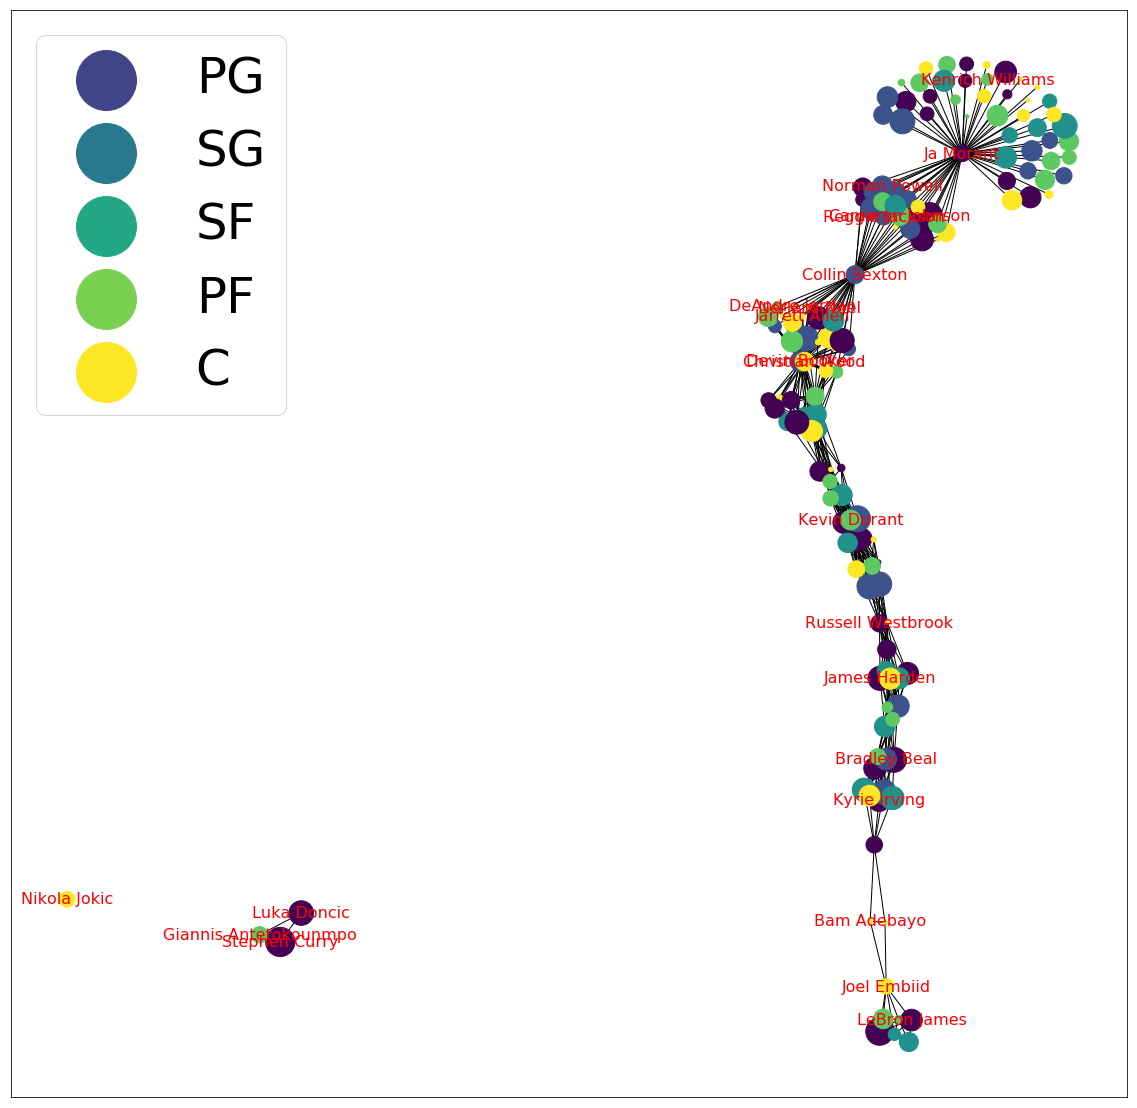

In [435]:
np.random.seed(18)

plt.figure(figsize = (20, 20)) 

sizes = [70*(i+0.2) for i in three]

colors_pos = [player_pos.get(node) for node in g.nodes()]
cmap=plt.cm.viridis
maxval = np.max(colors_pos) 

nx.draw_networkx(g, font_size=16, 
                 node_size=sizes, 
                 with_labels = True, 
                 labels = labels, 
                 font_color = 'r', 
                 node_color = pc)
#  horizontalalignment='left'

for v in set(colors_pos):
    plt.scatter([],[], c=[cmap(v/maxval)], label='{}'.format(pos_dict[v]))

plt.legend(loc='upper left', markerscale=10, fontsize=50)
plt.show()

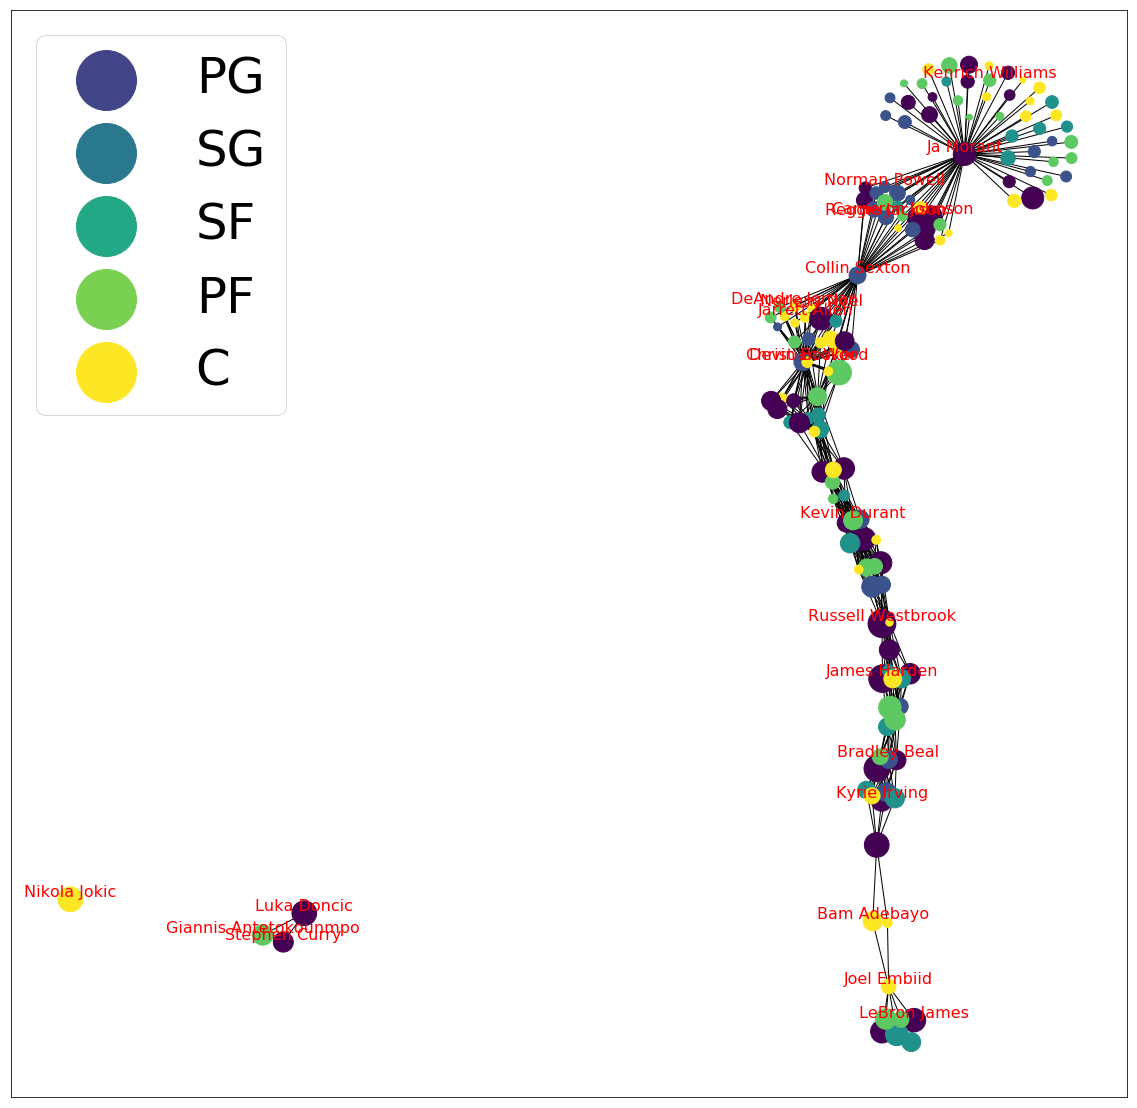

In [440]:
np.random.seed(18)

plt.figure(figsize = (20, 20)) 

sizes = [70*(i) for i in ast]

colors_pos = [player_pos.get(node) for node in g.nodes()]
cmap=plt.cm.viridis
maxval = np.max(colors_pos) 

nx.draw_networkx(g, font_size=16, 
                 node_size=sizes, 
                 with_labels = True, 
                 labels = labels, 
                 font_color = 'r', 
                 node_color = pc,
                verticalalignment='bottom')
#  horizontalalignment='left'

for v in set(colors_pos):
    plt.scatter([],[], c=[cmap(v/maxval)], label='{}'.format(pos_dict[v]))

plt.legend(loc='upper left', markerscale=10, fontsize=50)
plt.show()

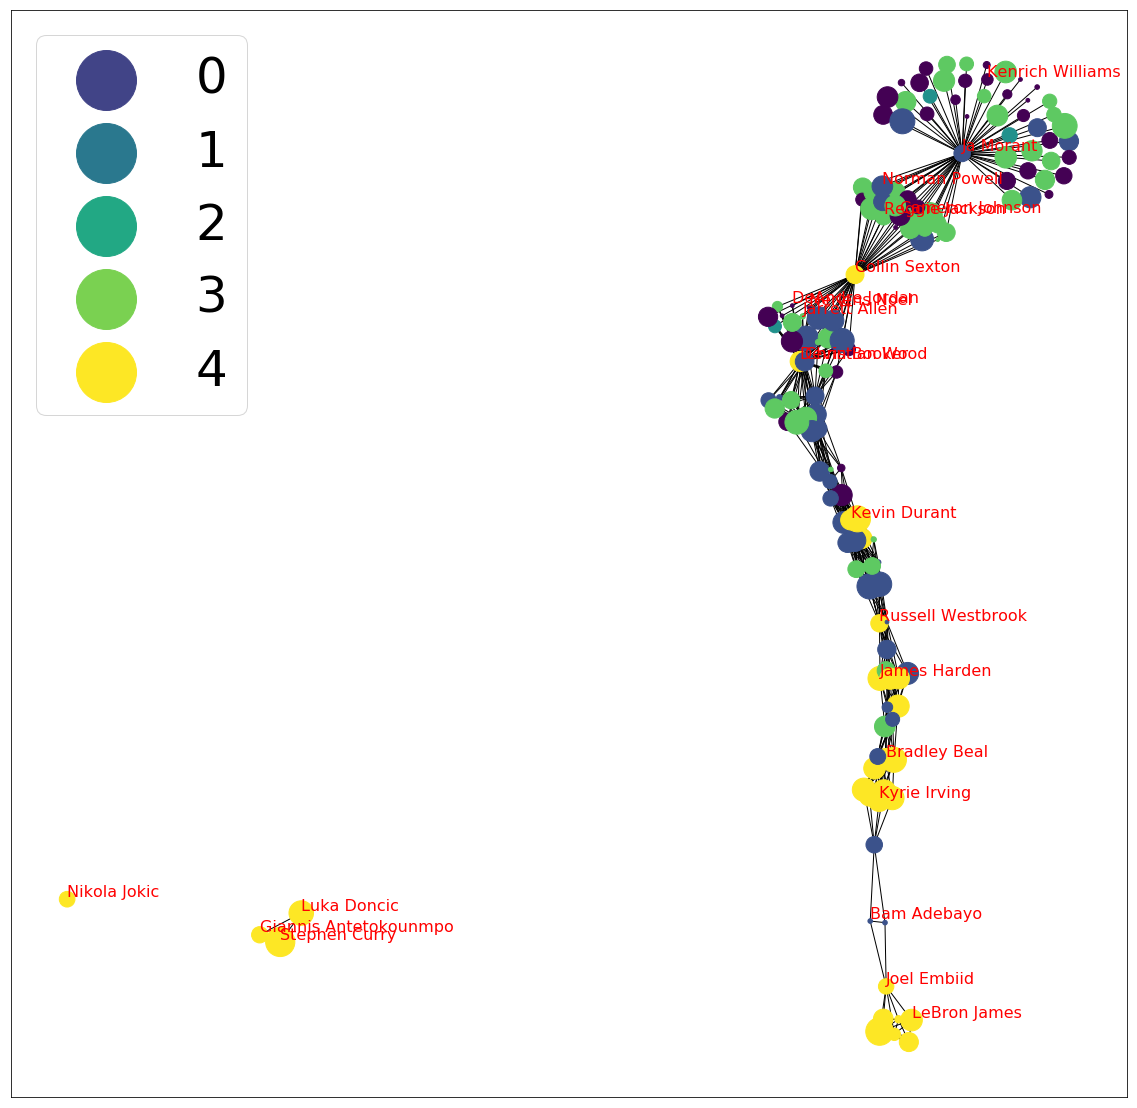

In [437]:
np.random.seed(18)

# pos = nx.spring_layout(g, k=0.1, iterations=20)
plt.figure(figsize = (20, 20)) 

sizes = [70*(i+0.2) for i in three]

colors_cluster = [player_cluster.get(node) + 1 for node in g.nodes()]
cmap=plt.cm.viridis
maxval = np.max(colors_cluster)

nx.draw_networkx(g, font_size=16, 
                 node_size=sizes, 
                 with_labels = True, 
                 labels = labels, 
                 font_color = 'r', 
                 node_color = cc,
                 horizontalalignment='left',
                verticalalignment='bottom')

for v in set(colors_cluster):
    plt.scatter([],[], c=[cmap(v/maxval)], label='{}'.format(v-1))

plt.legend(loc='upper left', markerscale=10, fontsize=50)
plt.show()

In [21]:
cluster_variables = [
    'PTS',
    'TRB',
    'AST',
    'STL',
    'BLK',
]

In [22]:
# Index df on cluster ID
tidy_df = all_players.set_index('Pos')
# Keep only variables used for clustering
tidy_df = tidy_df[cluster_variables]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_df = tidy_df.stack()
# Take indices into proper columns
tidy_df = tidy_df.reset_index()
# Rename column names
tidy_df = tidy_df.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_df.head()

,Pos,Attribute,Values
0,PF,PTS,13.0
1,PF,TRB,5.8
2,PF,AST,3.4
3,PF,STL,0.7
4,PF,BLK,0.7


C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0.98,'2020-21 Player Stat Distribution')

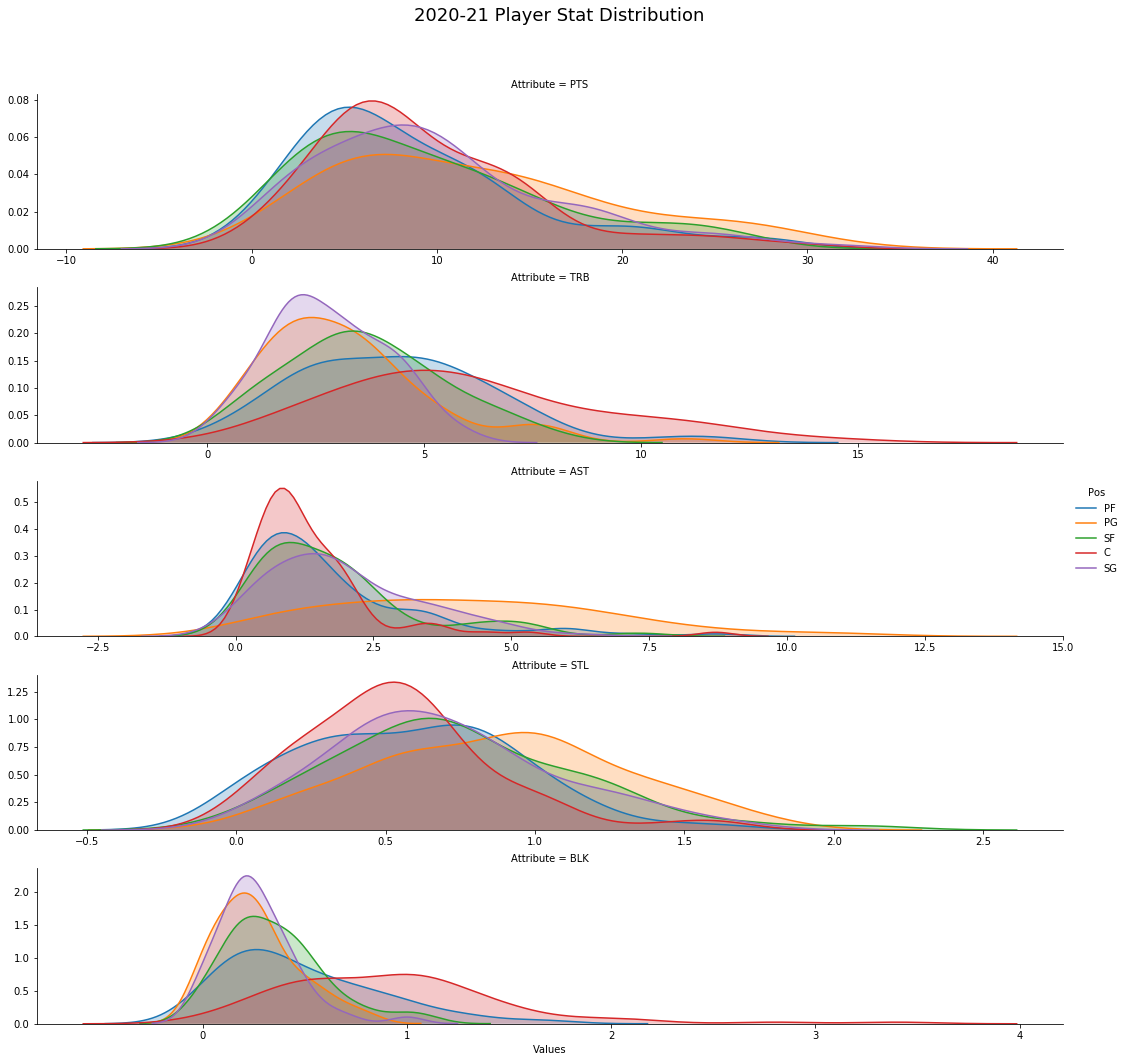

In [23]:
# Setup the facets
facets = sns.FacetGrid(data=tidy_df, col='Attribute', hue='Pos', \
                  sharey=False, sharex=False, aspect=5, col_wrap=1)
# Build the plot from `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()
_.fig.subplots_adjust(top=0.9)
_.fig.suptitle('2020-21 Player Stat Distribution',size=18)

### 1976 Stuff

In [37]:
vorp_1976 = pd.read_excel('VORP_1976.xlsx')
vorp_1976['Player'] = vorp_1976['Player'].apply(Clean_names)
vorp_1976

,Player,VORP
0,Zaid Abdul-Aziz,-0.1
1,Kareem Abdul-Jabbar,8.7
2,Tom Abernethy,0.6
3,Alvan Adams,3.2
4,Don Adams,0.1
...,...,...
352,Willie Wise,0.3
353,Dave Wohl,-0.6
354,Dave Wohl,-0.1
355,Dave Wohl,-0.5


In [38]:
old_players = pd.read_excel('nba_stats_1976.xlsx')
old_players['Player'] = old_players['Player'].apply(Clean_names)
old_players['Pos'] = old_players['Pos'].apply(clean_pos)
player_pos = old_players[['Player', 'Pos']].drop_duplicates()

old_players = pd.merge(old_players, vorp_1976, on='Player')
old_players = old_players.groupby('Player').mean()
old_players = pd.merge(old_players, player_pos, on='Player')

old_players['Pos_Num'] = old_players['Pos'].apply(pos)
old_players

,Player,TRB,AST,STL,BLK,PTS,VORP,Pos,Pos_Num
0,Aaron James,3.6,1.1,0.4,0.1,10.9,0.1,SF,3
1,Adrian Dantley,7.6,1.9,1.2,0.2,20.3,2.5,SF,3
2,Al Eberhard,3.3,0.7,0.7,0.2,6.9,-0.2,SF,3
3,Al Skinner,4.6,3.7,1.3,0.7,12.6,1.1,SG,2
4,Alex English,2.8,0.4,0.3,0.3,5.2,0.0,SF,3
...,...,...,...,...,...,...,...,...,...
291,Willie Norwood,3.8,1.3,0.8,0.1,7.7,0.3,SF,3
292,Willie Smith,0.0,0.0,0.0,0.0,0.0,0.0,PG,1
293,Willie Wise,3.4,1.9,0.8,0.2,8.2,0.3,SF,3
294,World B.,3.0,3.4,1.0,0.3,16.3,0.7,SG,2


In [39]:
cluster_variables

['PTS', 'TRB', 'AST', 'STL', 'BLK']

In [40]:
# Index df on cluster ID
old_df = old_players.set_index('Pos')
# Keep only variables used for clustering
old_df = old_df[cluster_variables[:-1]]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
old_df = old_df.stack()
# Take indices into proper columns
old_df = old_df.reset_index()
# Rename column names
old_df = old_df.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_df.head()

,Pos,Attribute,Values
0,PF,PTS,13.0
1,PF,TRB,5.8
2,PF,AST,3.4
3,PF,STL,0.7
4,PF,BLK,0.7


C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\angus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

Text(0.5,0.98,'1976-77 Player Stat Distribution')

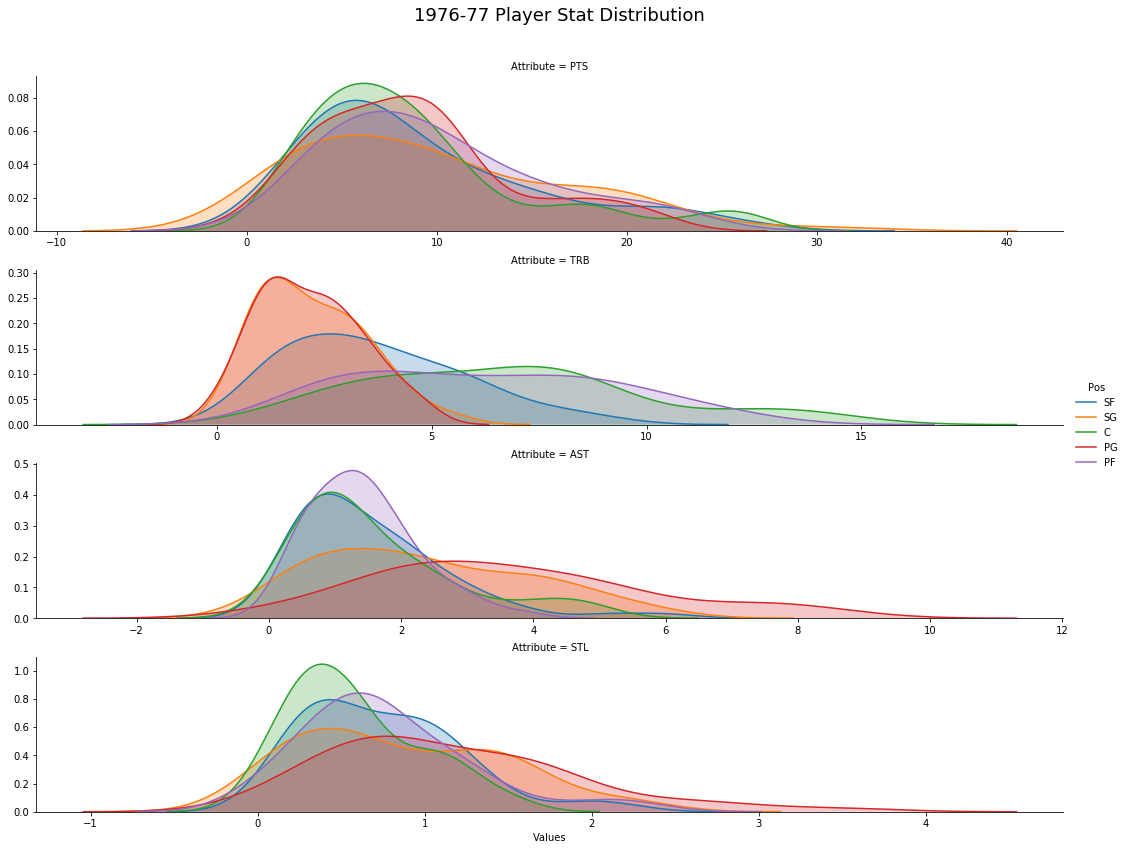

In [41]:
# Setup the facets
facets = sns.FacetGrid(data=old_df, col='Attribute', hue='Pos', \
                  sharey=False, sharex=False, aspect=5, col_wrap=1)
# Build the plot from `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()
_.fig.subplots_adjust(top=0.9)
_.fig.suptitle('1976-77 Player Stat Distribution', size=18)

In [42]:
edges_1976 = pd.read_csv('edges_1976.csv')

In [43]:
g2 = nx.from_pandas_edgelist(edges_1976, source='source', target='target')

In [357]:
old_player_pos = dict(zip(list(old_players['Player']), old_players['Pos_Num']))
old_player_ast = dict(zip(list(old_players['Player']), old_players['AST']))

# pos_abr_num = dict(zip([1,2,3,4,5], ['y', 'g','t', 'b', 'p']))

In [358]:
nx.set_node_attributes(g2, old_player_pos, 'Position')
old_pc = list(nx.get_node_attributes(g2,'Position').values())

nx.set_node_attributes(g2, old_player_ast, 'AST')
old_ac = list(nx.get_node_attributes(g2,'AST').values())

In [359]:
colors = [old_player_pos.get(node) for node in g2.nodes()]

In [360]:
cmap=plt.cm.viridis
maxval = np.max(colors) 

In [361]:
pos_dict = dict(zip([1,2,3,4,5], ['PG', 'SG', 'SF', 'PF', 'C']))

In [362]:
labels = {}    

for node in g2.nodes(data=True):
    if (int(g2.degree(node[0]))) < 6: #Label nodes if degree > 30 OR player is top 10 by ESPN
        #set the node name as the key and the label as its value 
        labels[node[0]] = float(old_players[old_players['Player'] == node[0]].VORP)

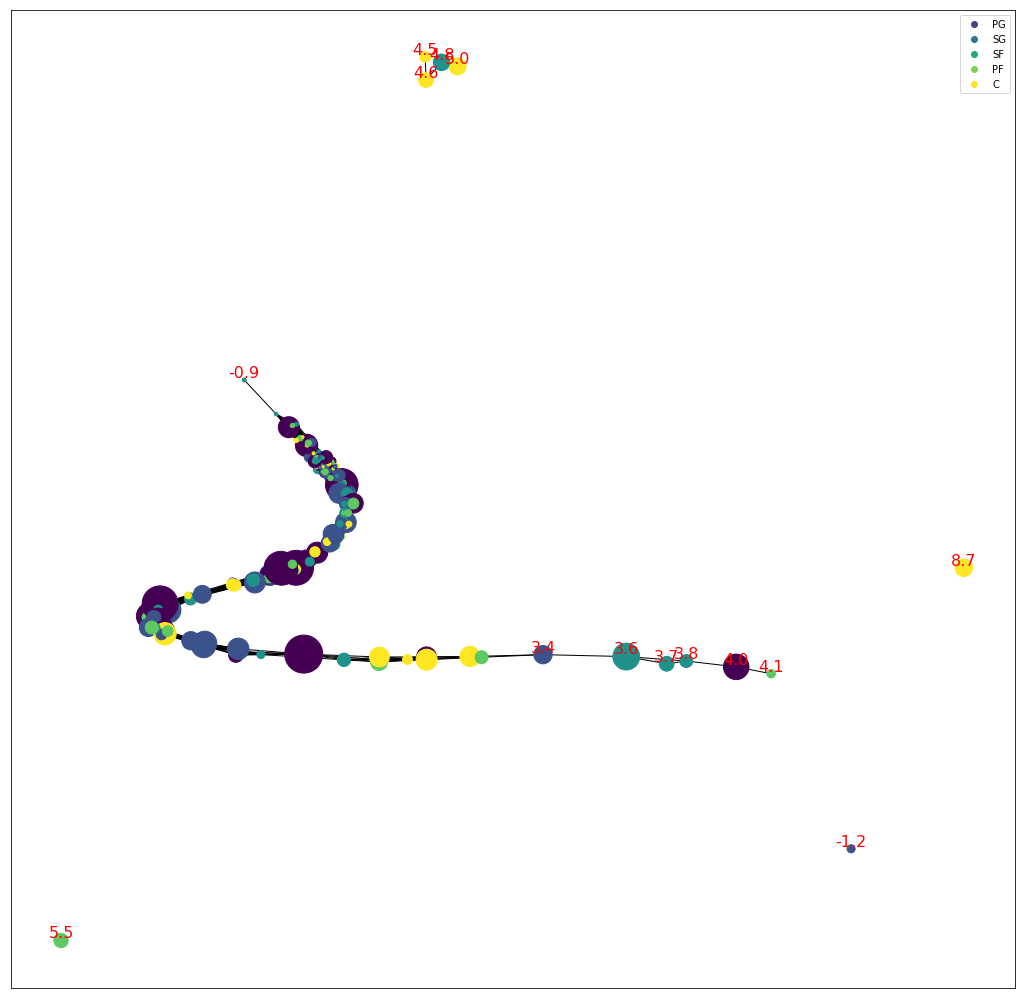

In [365]:
np.random.seed(18)

# pos = nx.spring_layout(g, k=0.1, iterations=20)
plt.figure(figsize = (18, 18)) 

sizes = [20*i**2 for i in old_ac]

nx.draw_networkx(g2, node_color = old_pc, 
                 node_size = sizes, 
                 labels = labels, 
                 with_labels=True,
                 font_size=16,
                 font_color='r',
                 verticalalignment='bottom')

for v in set(colors):
    plt.scatter([],[], c=[cmap(v/maxval)], label='{}'.format(pos_dict[v]))

plt.legend()
plt.show()


In [55]:
old_players.sort_values('VORP', ascending=False)[:10][['Player','VORP','Pos']].reset_index().drop(columns='index')

,Player,VORP,Pos
0,Kareem Abdul-Jabbar,8.7,C
1,Bobby Jones,5.5,PF
2,Bill Walton,5.0,C
3,Julius Erving,4.8,SF
4,Bob Lanier,4.6,C
5,Artis Gilmore,4.5,C
6,Elvin Hayes,4.1,PF
7,Paul Westphal,4.0,PG
8,George Gervin,3.8,SF
9,Billy Knight,3.7,SF


In [393]:
top_50_edges['source'].unique()

array(['Ben Simmons', 'Chris Paul', 'Damian Lillard', "De'Aaron Fox",
       'Donovan Mitchell', 'Ja Morant', 'Jamal Murray', 'James Harden',
       'Kyrie Irving', 'LeBron James', 'Luka Doncic', 'Malcolm Brogdon',
       'Russell Westbrook', 'Stephen Curry', 'Trae Young', 'Bradley Beal',
       'CJ McCollum', 'Collin Sexton', 'Devin Booker', 'Fred VanVleet',
       'Jaylen Brown', 'Terry Rozier', 'Zach LaVine', 'Brandon Ingram',
       'Gordon Hayward', 'Jayson Tatum', 'Jimmy Butler', 'Kawhi Leonard',
       'Khris Middleton', 'Paul George', 'Anthony Davis', 'DeMar DeRozan',
       'Domantas Sabonis', 'Giannis Antetokounmpo', 'Julius Randle',
       'Kevin Durant', 'Pascal Siakam', 'Tobias Harris',
       'Zion Williamson', 'Bam Adebayo', 'Christian Wood', 'Clint Capela',
       'Joel Embiid', 'Karl-Anthony Towns', 'Kristaps Porzingis',
       'Nikola Jokic', 'Nikola Vucevic', 'Rudy Gobert'], dtype=object)

In [18]:
top_50_edges

,source,target
0,Ben Simmons,Ben Simmons
1,Ben Simmons,De'Aaron Fox
2,Ben Simmons,Jamal Murray
3,Ben Simmons,Malcolm Brogdon
4,Ben Simmons,Russell Westbrook
...,...,...
673,Zion Williamson,Damian Lillard
674,Zion Williamson,Jimmy Butler
675,Zion Williamson,Joel Embiid
676,Zion Williamson,Kawhi Leonard


In [17]:
graph_names = list(set(list(top_50_edges['target'].unique()) + list(top_50_edges['source'].unique())))
len(graph_names)

152